# Imports

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading dataset and turning ints into floats for better performace

In [90]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Creating model

In [196]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer="l2")
])

# Making predictions and turning them into probability

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.14977102, 0.076687  , 0.07143319, 0.10852464, 0.08381711,
        0.14193021, 0.06259366, 0.07566711, 0.08320863, 0.1463674 ]],
      dtype=float32)

In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.10504833, 0.09764481, 0.09713314, 0.10080361, 0.09834351,
        0.10422789, 0.09627832, 0.09754527, 0.09828369, 0.10469139]],
      dtype=float32)

# Creating loss function

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [8]:
loss_fn(y_train[:1], predictions).numpy()

1.9524199

# Adding optimizer, loss function and metrics to the model

In [197]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=7e-4, momentum=0.15, centered=True), loss=loss_fn, metrics=['accuracy'])

# Training the model

In [199]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0218 - accuracy: 0.9949 - val_loss: 0.0733 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0206 - accuracy: 0.9948 - val_loss: 0.0804 - val_accuracy: 0.9817
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0188 - accuracy: 0.9952 - val_loss: 0.0822 - val_accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0163 - accuracy: 0.9959 - val_loss: 0.0812 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0762 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.0761 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0134 - accuracy: 0.9963 - val_loss: 0.0856 - val_ac

# Evaluating trained model by test data

In [200]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0724 - accuracy: 0.9847 - 1s/epoch - 4ms/step


[0.0724213719367981, 0.9847000241279602]

# Plotting the loss value and accuracy on both train and test data

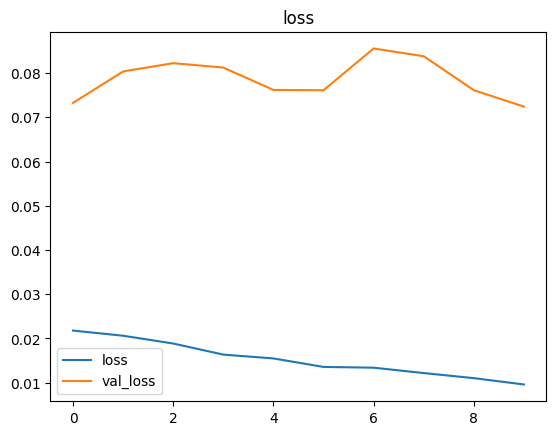

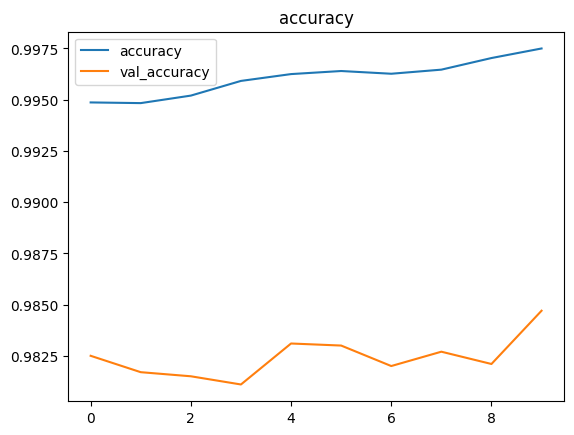

In [201]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()
plt.show()